# Multiagent Pattern - Multiagent Collaboration

<img src="../img/multiagent_pattern.png" alt="Alt text" width="500"/>

---

You may have heard about frameworks like [CrewAI](https://www.crewai.com/) or [AutoGen](https://microsoft.github.io/autogen/0.2/), which allow you to create multi-agent applications.

These frameworks implement different variations of the multi-agent pattern, in which tasks are divided into **smaller subtasks executed by different roles** (e.g. one agent can be a software engineer, another a project manager, etc.)

For this final lesson, I wanted to build something more elaborate. That's why I've been working on a 𝐦𝐢𝐧𝐢𝐦𝐚𝐥𝐢𝐬𝐭 𝐯𝐞𝐫𝐬𝐢𝐨𝐧 𝐨𝐟 𝐂𝐫𝐞𝐰𝐀𝐈, drawing inspiration from two of its key concepts: 𝐂𝐫𝐞𝐰 and 𝐀𝐠𝐞𝐧𝐭.

Additionally, I've also borrowed ideas from [𝐀𝐢𝐫𝐟𝐥𝐨𝐰](https://airflow.apache.org/)'𝐬 𝐝𝐞𝐬𝐢𝐠𝐧 𝐩𝐡𝐢𝐥𝐨𝐬𝐨𝐩𝐡𝐲, using >> and << to define dependencies between my agents. In this micro-CrewAI, 𝐚𝐠𝐞𝐧𝐭𝐬 are equivalent to 𝐀𝐢𝐫𝐟𝐥𝐨𝐰 𝐓𝐚𝐬𝐤𝐬 and the 𝐂𝐫𝐞𝐰 is equivalent to an 𝐀𝐢𝐫𝐟𝐥𝐨𝐰 𝐃𝐀𝐆.

Take a look at the previous lessons if you haven't!

* [First Lesson: The Reflection Pattern](https://github.com/neural-maze/agentic_patterns/blob/main/notebooks/reflection_pattern.ipynb)
* [Second Lesson: The Tool Pattern](https://github.com/neural-maze/agentic_patterns/blob/main/notebooks/tool_pattern.ipynb)
* [Third Lesson: The Planning Pattern](https://github.com/neural-maze/agentic_patterns/blob/main/notebooks/planning_pattern.ipynb)

**Let's begin!!** 💪

## The Agent Class

First of all, we need an **Agent Class**. This class implements an
Agent, and internally it implements the ReAct technique (check [Lesson 3](https://github.com/neural-maze/agentic_patterns/blob/main/notebooks/planning_pattern.ipynb) if you want to see this technique in detail!).

In [1]:
from agentic_patterns.multiagent_pattern.agent import Agent

Let's create some example agent, to see how it works.

In [2]:
agent_example = Agent(
    name="Poet Agent",
    backstory="You are a well-known poet, who enjoys creating high quality poetry.",
    task_description="Write a poem about the meaning of life",
    task_expected_output="Just output the poem, without any title or introductory sentences",
)

In [3]:
print(agent_example.run())

In fleeting whispers, life's enigma calls
A mysterious melody, beyond mortal walls
A dance of moments, lost in time and space
A search for answers, a wondrous, endless chase

Through joy and sorrow, we wander and roam
Seeking the truth, our hearts' eternal home
A sense of belonging, a purpose to claim
A reason to live, a story to proclaim

In love and laughter, we find our way
Through trials and tribulations, we face the day
With every breath, a new page unfolds
A chapter in the book of life, yet untold

The meaning of life, a question we all pose
A riddle, wrapped in mystery, as the ages disclose
Perhaps, in living, we find the key
To unlock the secrets, of humanity

In the beauty of nature, we find our place
A part of the universe, a single, shining face
Connected to all, yet unique and apart
A thread in the tapestry, of life's grand work of art


You can also associate tools with the agent. Let's create a tool for writing some string into a CSV.

In [4]:
import csv
from agentic_patterns.tool_pattern.tool import tool

In [5]:
@tool
def write_str_to_txt(string_data: str, txt_filename: str):
    """
    Writes a string to a txt file.

    This function takes a string and writes it to a text file. If the file already exists, 
    it will be overwritten with the new data.

    Args:
        string_data (str): The string containing the data to be written to the file.
        txt_filename (str): The name of the text file to which the data should be written.
    """
    # Write the string data to the text file
    with open(txt_filename, mode='w', encoding='utf-8') as file:
        file.write(string_data)

    print(f"Data successfully written to {txt_filename}")

In [8]:
agent_tool_example = Agent(
    name="Writer Agent",
    backstory="You are a language model specialised in writing text into .txt files",
    task_description="Write the string 'This is a Tool Agent' into './tool_agent_example.txt'",
    task_expected_output="A .txt file containing the given string",
    tools=write_str_to_txt,
)

In [9]:
agent_tool_example.run()


Thought: I need to write a specific string to a .txt file

Using Tool: write_str_to_txt

Tool call dict: 
{'name': 'write_str_to_txt', 'arguments': {'string_data': 'This is a Tool Agent', 'txt_filename': './tool_agent_example.txt'}, 'id': 0}
Data successfully written to ./tool_agent_example.txt

Tool result: 
None

Observations: {0: None}


'A .txt file containing the given string'

## Defining Agent Dependencies

Let's define two agents now.

In [16]:
agent_1 = Agent(
    name="Poet Agent",
    backstory="You are a well-known poet, who enjoys creating high quality poetry.",
    task_description="Write a poem about the meaning of life",
    task_expected_output="Just output the poem, without any title or introductory sentences",
)

agent_2 = Agent(
    name="Poem Translator Agent",
    backstory="You are an expert translator especially skilled in Ancient Greek",
    task_description="Translate a poem into Ancient Greek", 
    task_expected_output="Just output the translated poem and nothing else"
)

We can define the agent dependencies using the `>>` operator.

In [17]:
agent_1 >> agent_2

Poem Translator Agent

This means `agent_2` depends on `agent_1`. We can check the dependencies and dependents of both agents.

In [18]:
print("Agent 1 dependencies: ", agent_1.dependencies)
print("Agent 1 dependents: ", agent_1.dependents)
print("Agent 2 dependencies: ", agent_2.dependencies)
print("Agent 2 dependencies: ", agent_2.dependents)

Agent 1 dependencies:  []
Agent 1 dependents:  [Poem Translator Agent]
Agent 2 dependencies:  [Poet Agent]
Agent 2 dependencies:  []


Now, if we run `agent_1`, the results will be added to `agent_2`'s context.

In [19]:
print(agent_1.run())

In the tapestry of time, a thread is spun 
A fleeting glimpse, a life is begun
The meaning sought, a mystery still 
A question whispered, a thousand hills

Is it love, a flame that burns so bright 
A beacon guiding, through darkest night 
Or justice, a balance to uphold 
A seeker of truth, in a world grown old

Perhaps it's freedom, a song to sing 
A voice raised high, with heart's wing 
Or wisdom, a treasure to unfold 
A sage's whispers, in a mystic's hold

Maybe it's the journey, not the end 
A path unwinding, through life's own bend 
A series of moments, joined as one 
A dance with time, beneath the golden sun

In this cosmic dance, we sway and spin 
Each step a choice, in the web of life within 
A thread of purpose, in an intricate weave 
The meaning of life, a tale we're still to convey.


In [20]:
print(agent_2.context)

Poem Translator Agent received context: 
In the tapestry of time, a thread is spun 
A fleeting glimpse, a life is begun
The meaning sought, a mystery still 
A question whispered, a thousand hills

Is it love, a flame that burns so bright 
A beacon guiding, through darkest night 
Or justice, a balance to uphold 
A seeker of truth, in a world grown old

Perhaps it's freedom, a song to sing 
A voice raised high, with heart's wing 
Or wisdom, a treasure to unfold 
A sage's whispers, in a mystic's hold

Maybe it's the journey, not the end 
A path unwinding, through life's own bend 
A series of moments, joined as one 
A dance with time, beneath the golden sun

In this cosmic dance, we sway and spin 
Each step a choice, in the web of life within 
A thread of purpose, in an intricate weave 
The meaning of life, a tale we're still to convey.


Now, if we run the second agent, it will use the context received from the previous agent to generate its output.

In [21]:
print(agent_2.run())

Ἐν τῷ ἱστῷ τοῦ χρόνου, βλαβή τις ἐνδέχεται 
Γνωσῆς ἀληθινῆς, βίος ἀρξάμενος
Ἡ ζητουμένη ἐννοία, αἰνίγματι ἔτι 
Ἑρώτημα ψιθύρισμα, χίλιοι λόφοι

Μήποτε ἔρως, φλὸξ ἡλίου ἐξαστραπτοῦσα 
Φάρος ἡγεμὼν καλύπτον ὄμματι τὸν σκιερὸν νύκτα 
ἈDllὰ δίκη, ἰσορροπίαν ἀπέχουσα 
Ζητῶν ἀληθείας, ἐν κόσμῳ ἀγήρῳ ἐξηρπασμένῳ

Ἀλλὰ λύσις, ᾠδή τις ᾀδεῖν 
Φωνή ὑψοῦσα, πτερύγων ἡ ψυχῆς 
Ἀλλὰ σοφία, θησαυρός ἠskirts  
Ῥήτωρ σοφιστὴς ψιθύριζε, μύστις ῥῆγμα

Ἢ τὸ πορευθέν, οὐ τέλος 
Ὀδὸς ἀναπλέκων, βίου ἰδίου σύγκ Maur 
Ἕξεις στιγμῶν σύζευξις 
Χορεία χρόνου, ὑπὸ ἀστέρος χρυσοῦ 

Ἔν τῇ κοσμικῇ χορείᾳ, ἐν κύκλῳ ἡμεῖς ἵσταμεν 
Ἕκαστον βῆμα, αἱρεσίς ἐστιν ἡ ἐν τη τοῦ βίου ἔσω διάπλασμα 
Ἕν᾿ ἡ ἀπαρ mắt τοῦ σκέπους, ἐν συμβάσει τοῦ κόσμου ἡ διαλεκτική 
Ἡ ἐν τῇ ζωῇ ἡμῶν σημασία ἀπαραμάρτητος, λόγος ἅπαξ ἡμῖν ἢτι ἐρρέθη.


## The Crew

In [22]:
from agentic_patterns.multiagent_pattern.agent import Agent
from agentic_patterns.multiagent_pattern.crew import Crew

In [23]:
with Crew() as crew:
    agent_1 = Agent(
        name="Poem Writer Agent",
        backstory="You are a well-known poet, who enjoys creating high quality poetry.",
        task_description="Write a poem about the meaning of life",
        task_expected_output="Just output the poem, without any title or introductory sentences",
    )

    agent_2 = Agent(
        name="Poem Translator Agent",
        backstory="You are an expert translator especially skilled in Spanish",
        task_description="Translate a poem into Spanish", 
        task_expected_output="Just output the translated poem and nothing else"
    )

    agent_3 = Agent(
        name="Writer Agent",
        backstory="You are an expert transcriber, that loves writing poems into txt files",
        task_description="You'll receive a Greek poem in your context. You need to write the poem into './poem.txt' file",
        task_expected_output="A txt file containing the greek poem received from the context",
        tools=write_str_to_txt,
    )

    agent_1 >> agent_2 >> agent_3

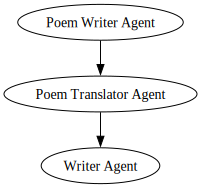

In [24]:
crew.plot()

In [25]:
crew.run()


RUNNING AGENT: Poem Writer Agent

In cosmic dance, we twirl and play,
A fleeting moment, in the grand display,
Our lives a whisper, a heartbeat's space,
A journey through, the human race.

We search for answers, day and night,
For meaning's thread, a guiding light,
Through trials and tribulations' fire,
We test our wills, and hearts' desire.

Is life a puzzle, a mystery still,
A tapestry woven, with intricate will,
Or is it simple, in its grand design,
A dance of love, a cosmic rhyme?

Perhaps it's both, a complex hue,
A melody played, with moments anew,
A story unfolding, with each new day,
A testament to life's own way.

We live, we love, we laugh, we cry,
Our moments precious, our memories high,
In this grand tapestry, we weave our part,
A unique thread, in life's great art.

And when our time, on this earth is done,
And our life's story, is forever won,
We'll leave behind, a legacy bold,
A contribution, to the cosmic fold.

RUNNING AGENT: Poem Translator Agent

En danza cósmica, g